# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

## Описание данных
<b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)  
<b>balcony</b> — число балконов  
<b>ceiling_height</b> — высота потолков (м)  
<b>cityCenters_nearest</b> — расстояние до центра города (м)  
<b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)  
<b>first_day_exposition</b> — дата публикации  
<b>floor</b> — этаж  
<b>floors_total</b> — всего этажей в доме  
<b>is_apartment</b> — апартаменты (булев тип)  
<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)  
<b>last_price</b> — цена на момент снятия с публикации  
<b>living_area</b> — жилая площадь в квадратных метрах(м²)  
<b>locality_name</b> — название населённого пункта  
<b>open_plan</b> — свободная планировка (булев тип)  
<b>parks_around3000</b> — число парков в радиусе 3 км  
<b>parks_nearest</b> — расстояние до ближайшего парка (м)  
<b>ponds_around3000</b> — число водоёмов в радиусе 3 км  
<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)  
<b>rooms</b> — число комнат  
<b>studio</b> — квартира-студия (булев тип)  
<b>total_area</b> — площадь квартиры в квадратных метрах (м²)  
<b>total_images</b> — число фотографий квартиры в объявлении  


<b>    Изучим файл с данными
    
<b>   Выявим пропуски и аномалии и "починим" их  
<b>   После предобработки займемся анализом датасета  
<b>    Найдем ответы на поставленные вопросы:  
<b>    -Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой  
    
<b>    -Какие факторы больше всего влияют на стоимость квартиры  
    
<b>    -Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений  
    
<b>    -Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге .


In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# откроем файл с данными и выведем первые 10 строк
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() # изучим основноую информацию о датасете
percent_of_null = (data.isna().sum()/len(data)*100).sort_values(ascending=False).round(1) # смотрим сколько пропусков в столбцах в процентах(округлим до одного знака после запятой)
percent_of_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

is_apartment            88.3
parks_nearest           65.9
ponds_nearest           61.6
balcony                 48.6
ceiling_height          38.8
airports_nearest        23.4
cityCenters_nearest     23.3
ponds_around3000        23.3
parks_around3000        23.3
days_exposition         13.4
kitchen_area             9.6
living_area              8.0
floors_total             0.4
locality_name            0.2
total_images             0.0
last_price               0.0
studio                   0.0
floor                    0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
open_plan                0.0
dtype: float64

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

По этим гистограмам пока мало что понятно, дальше более глубже изучим нужные нам столбцы

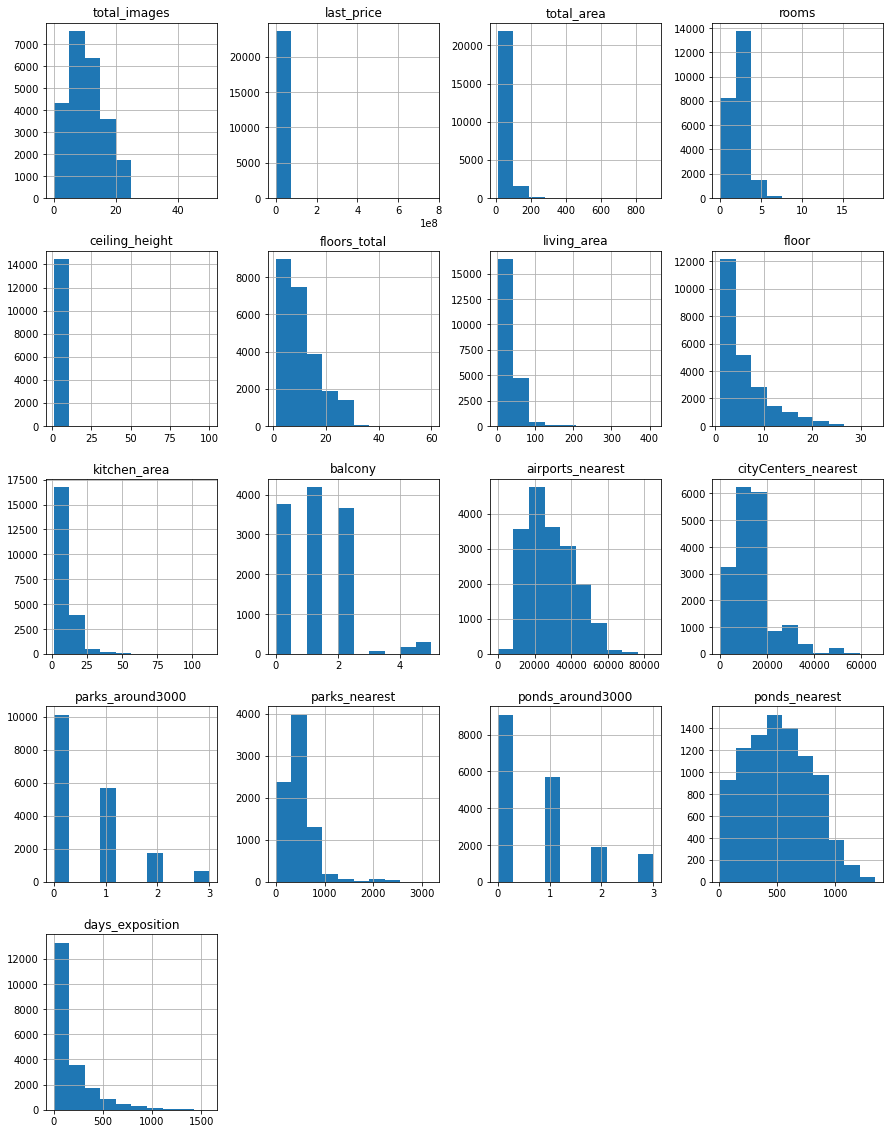

In [5]:
data.hist(figsize=(15, 20)); # Строим общую гистограмму для всех столбцов таблицы

### Вывод 1.
Замечаем, что есть много пропусков  
Можно выделить анти-топ 5 столбцов с максимальным значением пропусков  

<b>is_apartment</b> - 88.3%. Можно предположить, что при добавлении объявления, пользователи, которые добавляли именно квартиру просто не указывали данный параметр, тк не все понимают разницу между квартирой и аппартаментами, владельцы аппартов как раз указывали тип, тк им эта разница как раз-таки ясна. Позже посмотрим, что будем делать с этими пропусками, изучив заполненные значения, но думаю, что будет логично заполнить их значением 0  
<b>parks_nearest и ponds_nearest</b> - 65.9% и 61.6%. Данные о близлежащих парках и водоемах возможно по каким-то причинам не были выгружены системой. Имеяя ввиду, что это не критически важные параметры, и тот факт, что заполнить мы их приближенно к реальности никак не сможем - можно оставить эти пропуски, сделав анализ на основе имеющихся данных  
<b>balcony</b> - 48.6%. Данные пропуски можно объяснить тем, что если не указано значение, значит балкон впринципе отсутствует. Нужно проверить заполненные значения  
<b>ceiling_height</b> - 38.8%. Есть подозрение, что многие попросту не знают высоту потолков в своих квартирах, и поэтому решили пропустить этот параметр. Подумаем, какими значениями можно будет заполнить эти пропуски дальше  

По другим пропускам можно тоже сделать предположения:  
<b>airports_nearest и cityCenters_nearest</b> возможно не были выгружены системой из-за того, что расстояние до пунктов было ограничено каким то небольшим радиусом, так как адекватно заполнить не получится, думаю, что мы оставим эти пропуски как есть  
<b>ponds_around3000 и parks_around3000</b> по аналогии с <b>parks_nearest и ponds_nearest</b> пропустим эти пустоты  
<b>days_exposition</b> здесь пропуски возможно присутствуют из-за того, что сделка возможно была совершена, но объявление не было закрыто на сайте  
<b>kitchen_area, living_area</b> возможно эти данные пропущены, тк не были обязательны к заполнению  
то же самое и с <b>floors_total</b>  
в <b>locality_name</b> есть небольшой процент пропусков, возможно данные пользователи не заполняли данные, тк думали, что их город стоит по умолчанию, пропустим эти значения, тк процент незаполненных данных ничтожно мал



### Предобработка данных

#### Заполним пропуски  
<b>is_apartment:</b>

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)# Заполним пустые значения параметром False  
data['is_apartment'].isnull().value_counts()

False    23699
Name: is_apartment, dtype: int64

Значений с аппартаментами очень мало, но возможно это связано с тем, что датасет старенький и на тот момент было реально малое количество таких позиций на рынке

<b>parks_nearest и ponds_nearest</b> и <b>ponds_around3000 и parks_around3000</b> трогать не будем

<b>balcony:</b> пустые значения заполним нулями

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().value_counts()

False    23699
Name: balcony, dtype: int64

<b>ceiling_height:</b> Изучим высоту потолков в квартирах

1.5902618088658058


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.033022,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


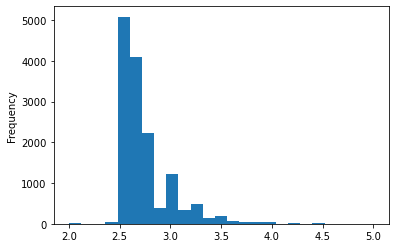

In [8]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 25, range=(2,5))
print(data['ceiling_height'].var())
data.corr()

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Разница между средним и медианным значением не существенна, думаю что можно заполнить пустоты медианным значением. Минимальные и максимальные аномальные значения 1м и 100м явно ошибочны, таких потолков не бывет.

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isnull().value_counts()
data['ceiling_height'].describe()
print(data['ceiling_height'].var())
data['ceiling_height'].describe()

0.9767338560068911


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

   Дисперсия снизилась с 1,59 до 0,97, коррреляция высоты потолков ничтожно мала, ко всем другим столбцам, средняя снизилась на 5см.

<b>kitchen_area, living_area</b>  
Заполним пустые значения жилой площади и площади кухни медианным значением отношения к общей площади:

In [11]:
living_ratio = data['living_area'].median() / data['total_area'].median()
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

data[data['total_area']*0.9 <= data['living_area'] + data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.00,8,False,...,12.0000,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.00,8,False,...,10.0000,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.2000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.00,6,False,...,9.0000,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,...,4.9175,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5.0,42.20,2,False,...,6.0000,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14.0,40.00,8,False,...,10.0000,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.00,2,False,...,15.3000,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.65,10.0,18.00,2,False,...,4.3400,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


На 23699 имеем всего 662 строчки в которых 90 процентов общей площади меньше суммы жилой и площади кухни, что сотавляет всего 2,79%, можно считать что это не критично и заполнение пропусков медианой приемлимо

<b>floors_total</b>

In [12]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

#### С пропусками разобрались, теперь можно исправить тип данных в столбцах

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<b> last_price</b> заменим на целочисленный тип  
<b>first_day_exposition</b> меняем на формат даты  
<b>floors_total, balcony</b> могут быть только целыми числами, в int  
<b>days_axposition</b> тоже приведем к int

In [14]:
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Далее устраним неявные дубликаты в названиях населённых пунктов:

In [15]:
data['locality_name'].unique()# Смотрим какие уникальные названия впринципе присутствуют
data['locality_name'].nunique()

364

Чтобы убрать неявные дубликаты в названиях населённых пунктов напишем цикл, который убирает все названия, которые написаны не с заглавных букв, то есть не имена собственные.

In [16]:
unduplicate_name = [] # создаем пустой список,  куда будем складывать нужные нам названия населенных пунктов
for row in data['locality_name']: # проходим по строкам, если строка начинается с заглавной буквы, то вносим в наш список
    if row[0].isupper():
        unduplicate_name.append(row)
    else:
        for i in range(len(row)): # в противном случае, идем по строке в поисках заглавной буквы
            while row[i].islower() or row[i] == ' ':
                i += 1
            unduplicate_name.append(row[i:])# как только находим заглавную букву, записываем в список название, которое следует после индекса i
            break;

In [17]:
data['locality_name'] = unduplicate_name

In [18]:
# check
data['locality_name'].nunique()

305

#### Найдем редкие и выбивающиеся значения

In [19]:
# Столбцы с выбросами
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.621108,5.878124,10.499499,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.399827,4.871485,6.037444,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.115385,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть выбивающиеся значения в <b>total_area, rooms, ceiling_height, kitchen_area</b>  
Начнем с <b>ceiling_height</b>

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

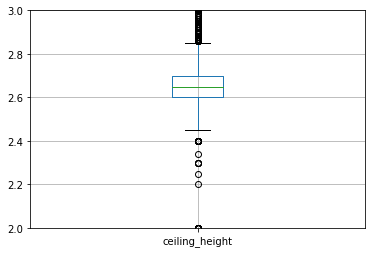

In [20]:
# Находим анаомально большие значения в высоте потолков
#data[data['ceiling_height'] > 15].sort_values('ceiling_height').tail(10)
data.boxplot(column='ceiling_height')
plt.ylim(2, 3)
data['ceiling_height'].describe()

Возможно при внесении данных пользователи допускали ошибку. Поправим эти ошибки:

   и уберем слишком маленькие нелогичные значения

In [21]:
#data.loc[data["ceiling_height"] > 13, "ceiling_height"] = data["ceiling_height"] / 10
#data[data['ceiling_height'] > 13].sort_values('ceiling_height').tail(10)
data = data.query('3.5 > ceiling_height > 2') # понимая, что в реальности квартир, с потолками ниже 2х метров не бывает, убираем лишние значения
data['ceiling_height'].describe()
data['ceiling_height'].count()

23119


Избавившись от выбросов, в итоге средняя опустилась, и стала примерно как медиана

Далее посмотрим <b>rooms</b>

   Значения с 0 это скорее всего студиии, оставим их как есть, а вот квартиры с более чем 6ю комнатами отбросим, отталкиваясь от диаграммы размаха

23119

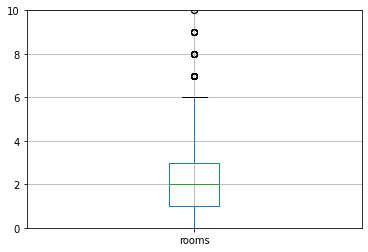

In [22]:
data.boxplot(column='rooms')
plt.ylim(0, 10)
data['rooms'].describe()
data['rooms'].value_counts()
data['ceiling_height'].count()

In [23]:
data = data.query('rooms <= 6')
data['ceiling_height'].count()

23052

Посмотрим на распределение площадей квртир

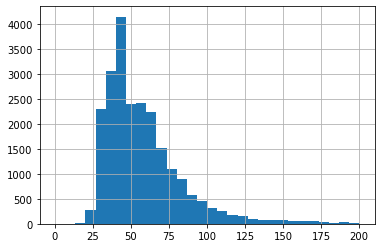

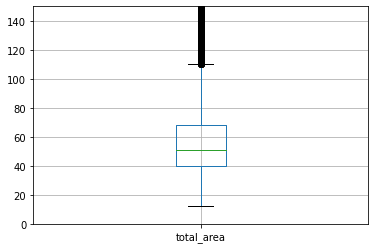

In [24]:
data['total_area'].hist(bins=30, range=(0,200))
plt.show()
data.boxplot(column='total_area')
plt.ylim(0, 150);

Выборку по общей площади квартиры ограничим 150м2

In [25]:
data = data.query('total_area <= 150 and total_area >= 10')
data['ceiling_height'].count()

22651

Площадь кухни

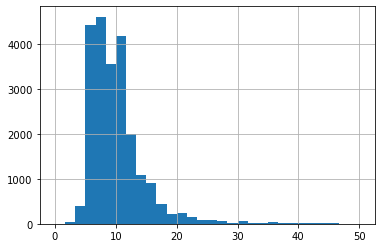

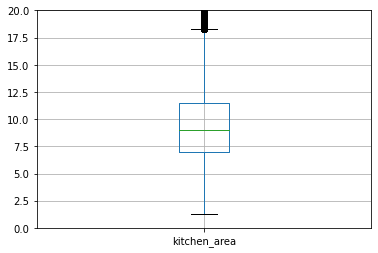

In [26]:
data['kitchen_area'].hist(bins=30, range=(0,50))
plt.show()
data.boxplot(column='kitchen_area')
plt.ylim(0, 20);

In [27]:
data = data.query('kitchen_area <= 20 and total_area >= 4')# трудно представить с такой маленькой площадью кухню как 2м2, поэтому добавим немного реальности
data['ceiling_height'].count()

21912

<b>kitchen_area</b> сильно зависима от общей площади, поэтому аномалии по этому пункту в основном ушли, превалирует площадь кухонь с площадью от 5 до 15 м2

<b>days_exposition

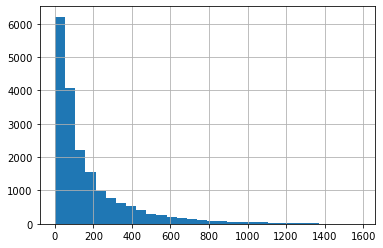

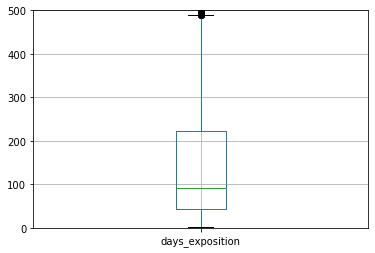

In [28]:
data['days_exposition'].hist(bins=30, range=(0,1580))
plt.show()
data.boxplot(column='days_exposition')
plt.ylim(0, 500);

In [29]:
data['ceiling_height'].count()

21912

<b>last_price

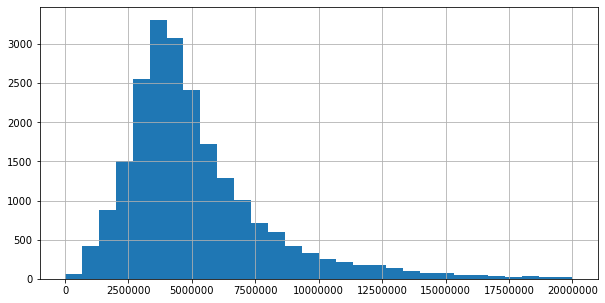

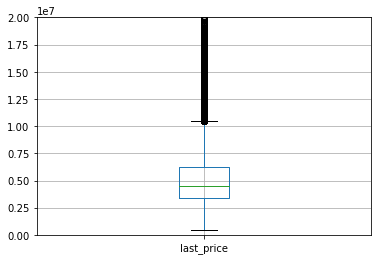

In [30]:
data['last_price'].hist(bins=30, figsize = (10,5),range=(0,20000000))
plt.gca().ticklabel_format(axis="x", style='plain')
plt.show()
data.boxplot(column='last_price')
plt.ylim(0, 20000000);

In [31]:
data = data.query('50000 <= last_price <= 10000000')
data['ceiling_height'].count()

20352

<b>living_area

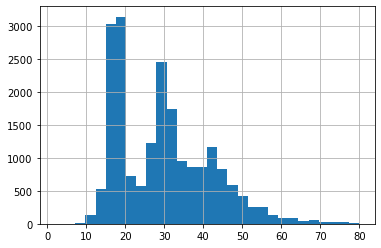

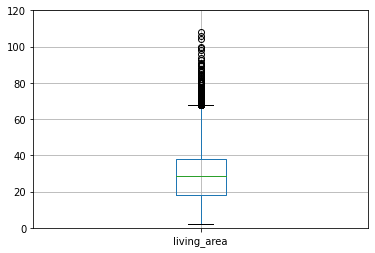

In [32]:
data['living_area'].hist(bins=30, range=(2,80))
plt.show()
data.boxplot(column='living_area')
plt.ylim(0, 120);

In [33]:
data = data.query('5 <= living_area <= 80')
data['ceiling_height'].count()

20317

<b>floor

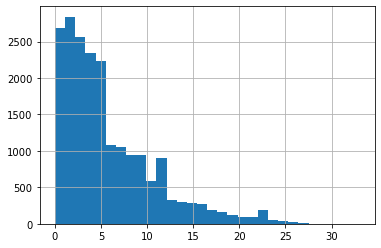

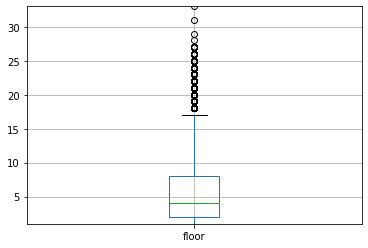

In [34]:
data['floor'].hist(bins=30, range=(0,33))
plt.show()
data.boxplot(column='floor')
plt.ylim(1, 33);

In [35]:
data['etaj'] = data['floor']
data = data.query('etaj <= 25')# по непонятной мне причине из столбца floor я не смог удалить лишние данные, 
data['floor'] = data['etaj']   # костыль с перезаписью в другой стобец мне помог
data['floor'].value_counts()
data['ceiling_height'].count()

20284

<b>floors_total

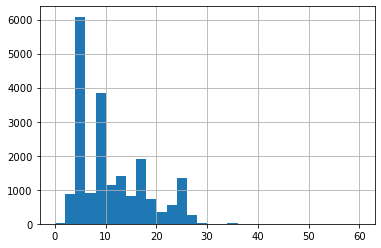

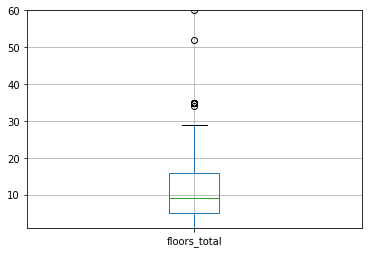

In [36]:
data['floors_total'].hist(bins=30, range=(0,60))
plt.show()
data.boxplot(column='floors_total')
plt.ylim(1, 60);

In [37]:
data = data.query('floors_total <= 30')
data['ceiling_height'].count()

20268

### Вывод 2.
Заканчивая предобработку данных можно сказать что данные в таблице были местами кривоваты, но важные пропущенные значения мы заполнили приближенными к реальности данными, избавились от аномальных значений и от неявных дублей

In [38]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7794
2,7128
3,4484
4,613
0,186
5,60
6,3


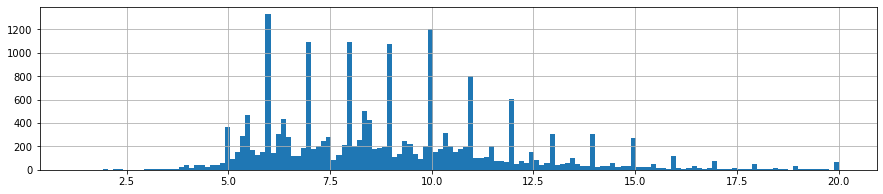

In [39]:
# check
data.kitchen_area.hist(bins = 150, figsize = (15,3));

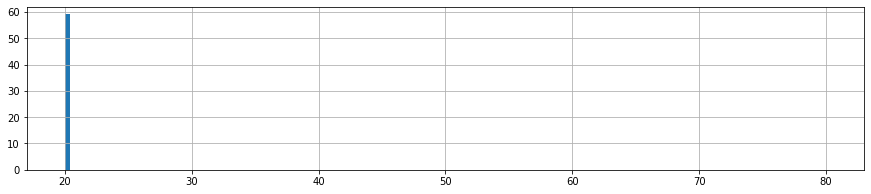

In [40]:
# check
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (20,80));

In [41]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,25.00,2.50,4.00,"960,572.60",13.00,4.38,1.00,2.00
0.500000,2.00,47.80,2.65,90.00,"4,300,000.00",28.70,8.60,4.00,9.00
0.900000,3.00,75.00,2.80,432.00,"7,400,000.00",46.15,13.00,13.00,22.00
0.997600,5.00,114.00,3.40,"1,223.38","10,000,000.00",73.00,20.00,24.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
# Добавляем новый столбец - цену за квадратный метр
data['sq_m_price'] = data['last_price'] / data['total_area']
data['sq_m_price'] = data['sq_m_price'].astype(int) # приведем его в целочисленный тип

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца по типу этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(0).astype(int)

### Проведите исследовательский анализ данных

count    20268.000000
mean        51.464138
std         16.932063
min         12.000000
25%         38.400000
50%         47.800000
75%         61.500000
max        146.000000
Name: total_area, dtype: float64

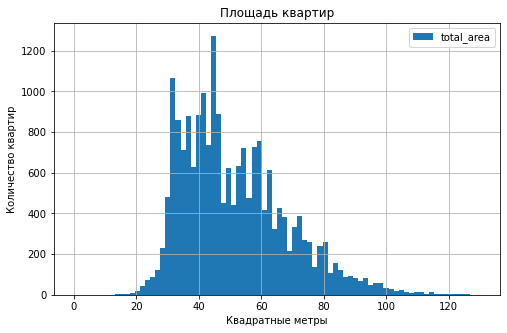

In [43]:
# Изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 80, grid=True, figsize = (8,5), range = (0,130))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
data['total_area'].describe()

Распределение в целом нормальное, больше всего квартир около 50 м2, что впринципе похоже на правду

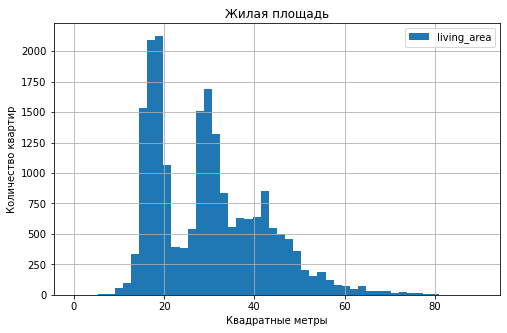

count    20268.000000
mean        29.637141
std         12.165457
min          5.000000
25%         18.110000
50%         28.700000
75%         38.000000
max         80.000000
Name: living_area, dtype: float64

In [44]:
# Жилая площадь
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (8,5), range = (0,90))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

Есть выбросы, но они вполне объяснимы, всплески по площади вероятнее всего относятся к 1 и 2х комнатным квартирам

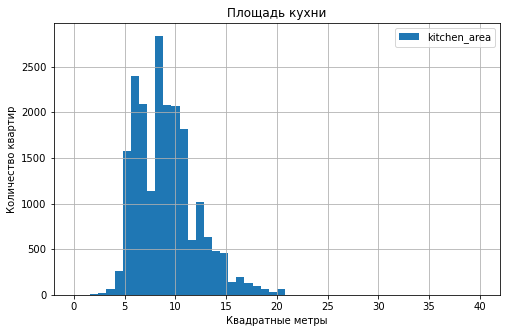

count    20268.000000
mean         9.057907
std          2.954306
min          1.300000
25%          6.900000
50%          8.600000
75%         10.800000
max         20.000000
Name: kitchen_area, dtype: float64

In [45]:
# Площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (8,5), range = (0,40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

Площадь кухни практически повторяет предыдущий график, что вполне логично

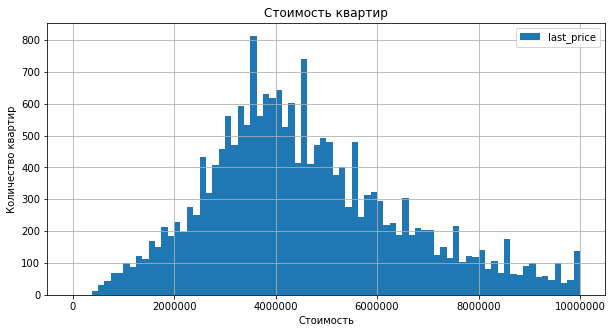

count      20268.000
mean     4588609.769
std      1929050.415
min       430000.000
25%      3250000.000
50%      4300000.000
75%      5700000.000
max     10000000.000
Name: last_price, dtype: float64

In [46]:
# Цена объекта
data.plot(y = 'last_price', kind = 'hist', bins =80, grid=True, figsize = (10,5), range = (0,10000000))
plt.gca().ticklabel_format(axis="x", style='plain') #приводим в читабельный формат на графике
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
pd.options.display.float_format = '{:.3f}'.format #приводим в читабельный формат
data['last_price'].describe()

В основном квартиры продаются в пределах 3-5 млн ₽ 

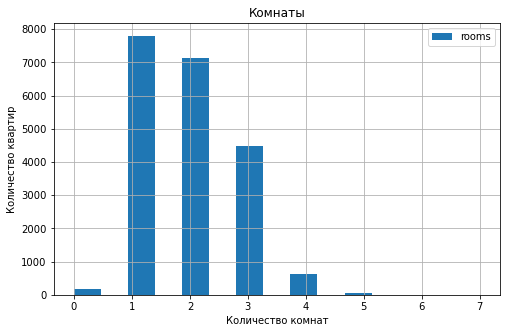

count   20268.000
mean        1.888
std         0.883
min         0.000
25%         1.000
50%         2.000
75%         3.000
max         6.000
Name: rooms, dtype: float64

In [47]:
# Количество комнат
data.plot(y = 'rooms', kind = 'hist', bins =15, grid=True, figsize = (8,5), range = (0,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

Больше всего 1 и 2х комнатных квартир, все как в реальной жизни

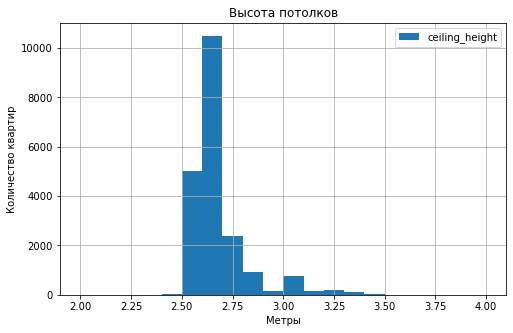

count   20268.000
mean        2.657
std         0.143
min         2.200
25%         2.600
50%         2.650
75%         2.650
max         3.490
Name: ceiling_height, dtype: float64

In [48]:
# Высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins =20, grid=True, figsize = (8,5), range = (2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].describe()

Большинство квартир высотой примерно 2,65м

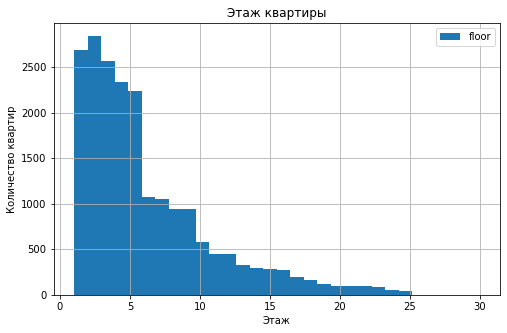

count   20268.000
mean        5.826
std         4.801
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        25.000
Name: floor, dtype: float64

In [49]:
# Этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins =30, grid=True, figsize = (8,5), range = (1,30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].describe()

Больше всего живут на первых пяти этажах, подозреваю, что это связано с тем, что больше всего зданий до 5 этажей, увидим это далее 

Text(0, 0.5, 'Количество квартир')

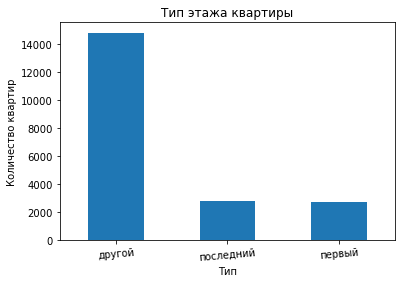

In [50]:
# Тип этажа квартиры
data['floor_type'].value_counts().plot(y='median', kind='bar')
plt.title('Тип этажа квартиры')
plt.xlabel('Тип')
plt.xticks(rotation = 5)
plt.ylabel('Количество квартир')

Все логично, не первых и не последних этажей в разы больше

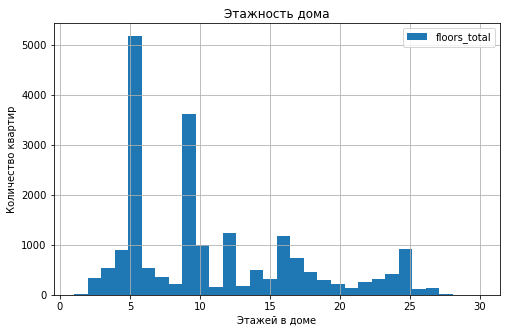

count   20268.000
mean       10.721
std         6.520
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        29.000
Name: floors_total, dtype: float64

In [51]:
# Общее количество этажей квартиры
data.plot(y = 'floors_total', kind = 'hist', bins =30, grid=True, figsize = (8,5), range = (1,30))
plt.title('Этажность дома')
plt.xlabel('Этажей в доме')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].describe()

Как и предполагал выше, больше всего представлено пятиэтажек и девятиэтажек

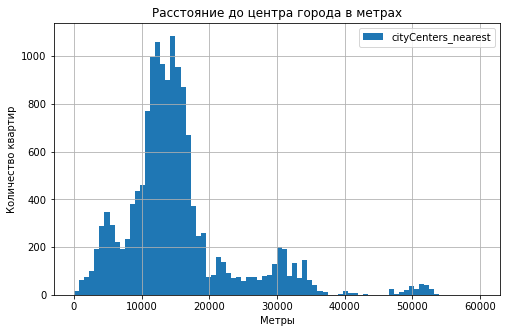

count   14940.000
mean    15303.076
std      8471.170
min       287.000
25%     10955.000
50%     13841.500
75%     16802.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

In [52]:
# расстояние до центра города в метрах
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 80, grid=True, figsize = (8,5), range = (1,60000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['cityCenters_nearest'].describe()

Большинство квартир располагается достаточно далеко от центра от 10 до 20км, но и до 5км от центра вполне много объектов

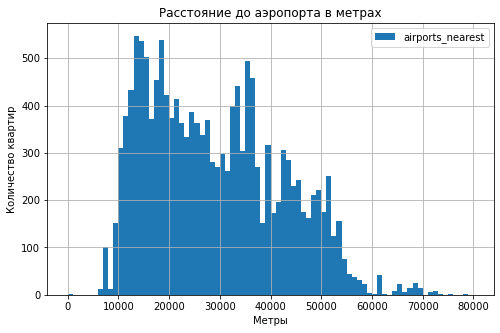

count   14928.000
mean    29012.999
std     13111.435
min         0.000
25%     17837.750
50%     27385.500
75%     38092.000
max     84869.000
Name: airports_nearest, dtype: float64

In [53]:
# Расстояние до ближайшего аэропорта
data.plot(y = 'airports_nearest', kind = 'hist', bins = 80, grid=True, figsize = (8,5), range = (0,80000))
plt.title('Расстояние до аэропорта в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['airports_nearest'].describe()

Эти данные мы не трогали, но гистограмма выглядит приемлимо, с редкими всплесками, которые можно объяснить плотными застройками некоторых районов

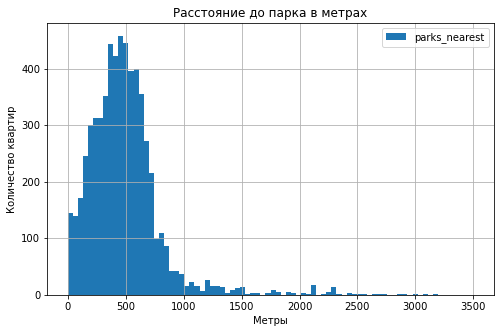

count   6065.000
mean     487.994
std      323.214
min        1.000
25%      293.000
50%      456.000
75%      613.000
max     3190.000
Name: parks_nearest, dtype: float64

In [54]:
# Расстояние до ближайшего парка
data.plot(y = 'parks_nearest', kind = 'hist', bins = 80, grid=True, figsize = (8,5), range = (0,3500))
plt.title('Расстояние до парка в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['parks_nearest'].describe()

С парками дела получше, большинство квартир, о которых есть данные находятся в 500 метрах от парков

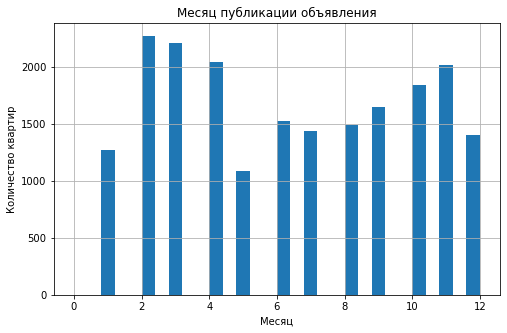

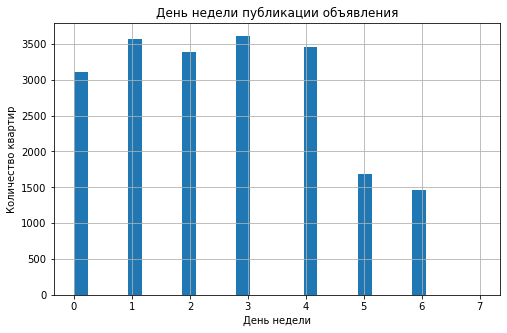

In [55]:
# День и месяц публикации объявления
data['month'].hist(bins = 30, grid=True, figsize = (8,5), range = (0,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
data['weekday'].hist(bins = 30, grid=True, figsize = (8,5), range = (0,7))
plt.title('День недели публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

   Наблюдаем сезонность по месяцам, с февраля по апрель наиболее активно выкладываются объявления, летом идет спад, наверняка все уезжают в отпуска, и до конца осени видим подъем.  
   По дням недели пользователи активнее всего в буднни, а в выходные многим не до продаж квартир

### Вывод 3.
  - <b>общая площадь</b> - больше всего продаются квартиры с площадью 50-56м2, больших квартиир (более 100м2) сильно меньше остальных;
  - <b>жилая площадь</b> - исходя из общей площади, здесь превалируют квартиры с 15-20м2 и 30-35м2, что объясняется размерами 1 и 2х комнатных квартир, квартир с жилой площадью более 50м2 достаточно мало;
  - <b>площадь кухни</b> - также, как и жилая площадь, пропорционально распределилась по размерам и площадь кухни, болшая часть из них - кухни 7-12м2, кухонь, с площадью более 15м2 меньшинство;
  - <b>цена объекта</b> - большая часть квартир стоит в пределах 2,5-6 млн ₽, есть небольшое количество квартир и сильно дешевле, есть и супердорогие стоимостью более 100 млн ₽, но их единицы;
  - <b>количество комнат</b> - здесь самые популярные квартиры как и ожидалось это 1 и 2х комнатные квартиры, 3х комнатных сильно меньше, но их тоже достаточно много, остальных мизерное количество;
  - <b>высота потолков</b> - после того как мы избавились от 100 метровых потолков, пришли к выводу, что в большинстве квартир потолки высотой от 2,5 до 2,75 м;
  - <b>этаж квартиры</b> - большинство продаваемых квартир располагается до 5го этажа, что объяснимо большим количеством 5ти этажек, также есть достаточное количество до 9 этажей, более 10 этажей заметно меньше, чем выше этаж - тем меньше квартир  ;
  - <b>тип этажа квартиры («первый», «последний», «другой»)</b> - здесь все логично, первых и последних этажей кратно меньше, чем остальных;
  - <b>общее количество этажей в доме</b> - как отмечал выше, болше всего на рынке квартир пяти и девяти этажных зданий, есть мини пики на 12, 16 и 25 этажках;
  - <b>расстояние до центра города в метрах</b> - основная масса квартир располагается на расстоянии 10-20 тысяч метров от центра, до 10 тоже есть немалое количество квартир, сильно больше, чем тех, которые за 20ю тысячами;
  - <b>расстояние до ближайшего аэропорта</b> - основная масса квартир располагается от 10 до 30км от аэропорта, что в целом не так уж и много, добираться недолго, и шум самолетов не мешает;
  - <b>расстояние до ближайшего парка</b> - эти данные, как и данные об аэропортах мы не трогали, тк они были выгружены системой, но в целом, думаю что на результаты это сильно не повлияло, у подавляющего большинства квартир парки не дальше 1го километра;
  - <b>день и месяц публикации объявления</b> - тут мы выяснили, что чаще всего объявления выкладывались(именно выкладывались, а не продавались, тк мы работали со столбцом first_day_exposition — дата публикации) с февраля по апрель, летом пользовоталем не продаж и наблюдаем спад, а начиная с августа видим некоторый рост вплоть до декабря. Если исходить из дня недели, четверг - самый активный день, но в целом в будни примерно одинаково активно размещались объявления, в выходные заметно меньше активность

<b>Изучим, как быстро продавались квартиры:</b>

In [56]:
data['days_exposition'].describe()

count   17865.000
mean      169.852
std       207.441
min         1.000
25%        43.000
50%        90.000
75%       216.000
max      1580.000
Name: days_exposition, dtype: float64

Видим большую разницу между средней и медианой, средняя больше в 1,75 раз.  
В среднем квартира продается 166 дней, по медиане почти 3 месяца
Самая долгая продажа чуть больше 4х лет, возможно кто-то не очень то и хотел продавать свою недвижимость)  
Самая быстрая - всего один день, но возможно это была не продажа, а просто пользователь снял объявление 

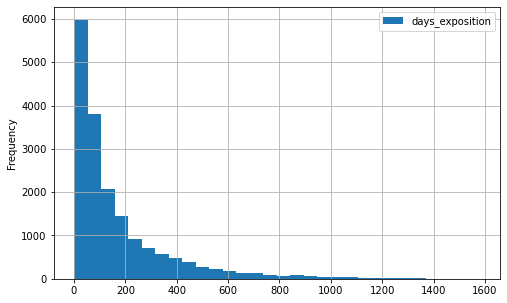

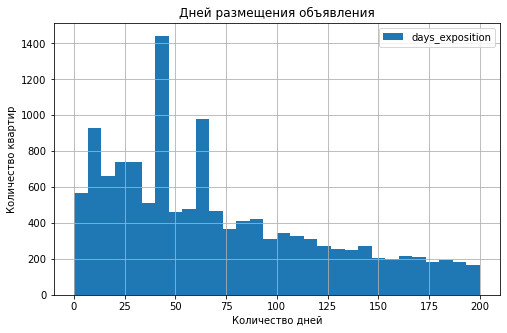

In [57]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (8,5), range = (0,1580))
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (8,5), range = (0,200))
plt.title('Дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

При приближении графика видим 3 выброса в районе 90, 60 и 45 дней.  
В правилах размещения объявлений https://yandex.ru/support/realty/paid.html видим, что в эти дни система автоматически закрывает объявления в зависимости от цены квартиры (Сейчас для Питера и Москвы другие правила, пик должен быть на 120 днях, но подозреваю что в 2015-2018гг правила были едины для всех)  
Избавимся от этих выбросов

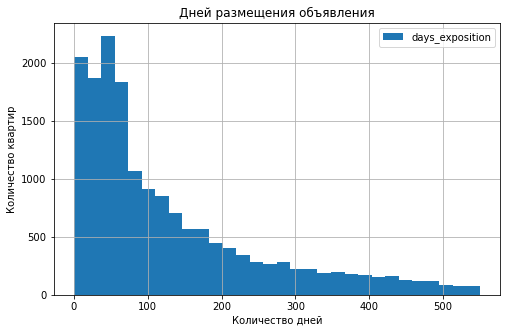

count   17865.000
mean      169.852
std       207.441
min         1.000
25%        43.000
50%        90.000
75%       216.000
max      1580.000
Name: days_exposition, dtype: float64

In [58]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (8,5), range = (0,550))
plt.title('Дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
data['days_exposition'].describe()

In [59]:
#data = data.query('days_exposition <= 370')# Отбросим также сильно большие значения исходя из диаграммы размаха
data['days_exposition'].describe()

count   17865.000
mean      169.852
std       207.441
min         1.000
25%        43.000
50%        90.000
75%       216.000
max      1580.000
Name: days_exposition, dtype: float64

После очистки от аномалий значения почти вернулись к изначальным, в среднем квартира продается 4 месяца, по медиане 3 месяца  


#### Попробуем ответить на вопрос "какие факторы больше всего влияют на общую (полную) стоимость объекта?"

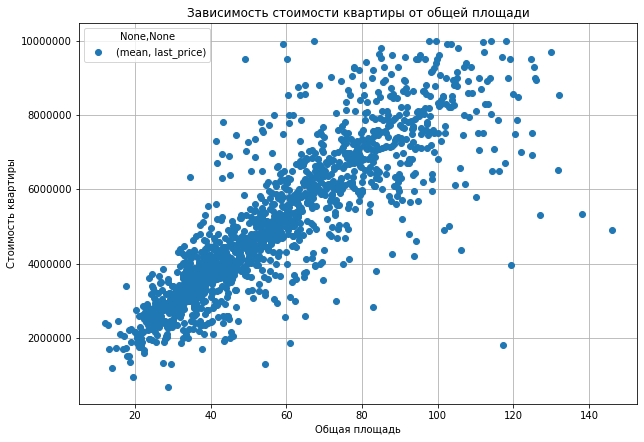

Корреляция цены и площади:


0.6558503109130073

In [60]:
# Зависимость стоимости квартиры от общей площади
(data
     .pivot_table(index='total_area', values='last_price', aggfunc = ['mean'])
     .plot(grid=True, style='o', figsize=(10, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и площади:')
data['total_area'].corr(data['last_price'])

Логично высокая корреляция, чем больше квартира, тем больше ее стоимость

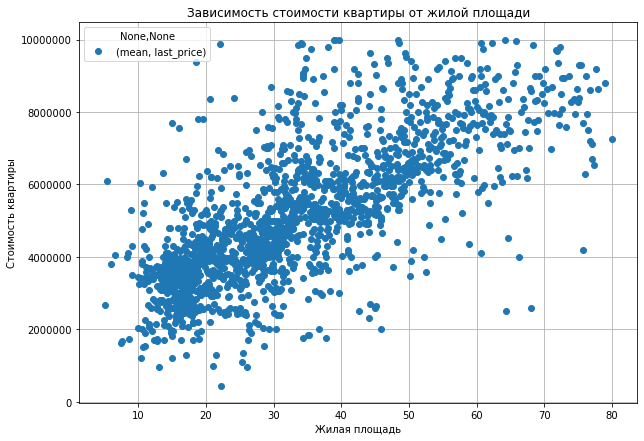

Корреляция цены и жилой площади:


0.5455514221049946

In [61]:
# Зависимость стоимости квартиры от жилой площади
(data
     .pivot_table(index='living_area', values='last_price', aggfunc = ['mean'])
     .plot(grid=True, style='o', figsize=(10, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и жилой площади:')
data['living_area'].corr(data['last_price'])

Здесь корреляция чуть ниже, но все равно вполне высокая

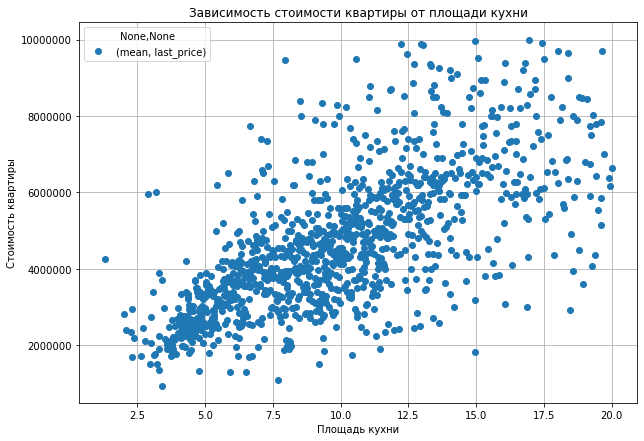

Корреляция цены и площади кухни:


0.4757816688726962

In [62]:
# Зависимость стоимости квартиры от площади кухни
(data
     .pivot_table(index='kitchen_area', values='last_price', aggfunc = ['mean'])
     .plot(grid=True, style='o', figsize=(10, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и площади кухни:')
data['kitchen_area'].corr(data['last_price'])

Есть немного шума, корреляция здесь средняя, зависимость незначительно меньше, чем у жилой площади

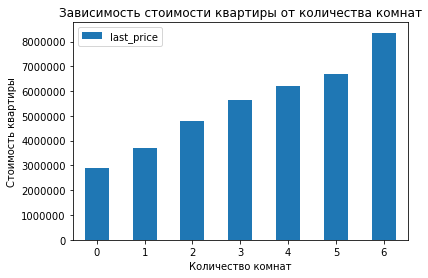

Корреляция цены и количества комнат:


0.4222402892381839

In [63]:
# Зависимость стоимости квартиры от количества комнат
(data
     .pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean'])
     .plot(y = 'mean', kind = 'bar')
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.xticks(rotation = 0)
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и количества комнат:')
data['rooms'].corr(data['last_price'])

Видим на графике высокую корреляцию, что в принципе логично, больше комнат -> больше площадь -> больше цена, но в среднем кореляция  0,4 не такая уж и большая, тк большекомнатных квартир очень мало

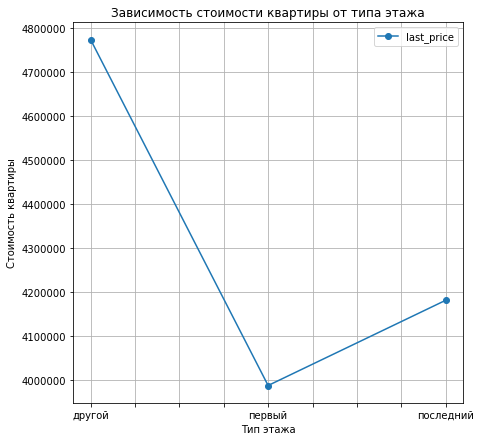

In [64]:
# Зависимость стоимости квартиры от типа этажа, на котором расположена квартира (первый, последний, другой)
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.show()

первый этаж продается заметно хуже, поэтому владельцы снижают стоимость своих квартир, чтобы все таки продать квартиру, последние этажи не так сильно пугают потенциальных покупателей, но продаются дешевле, чем другие этажи

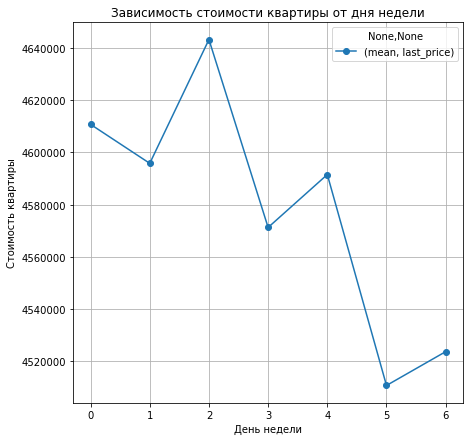

Корреляция цены и дня недели:
-0.013967308464039936


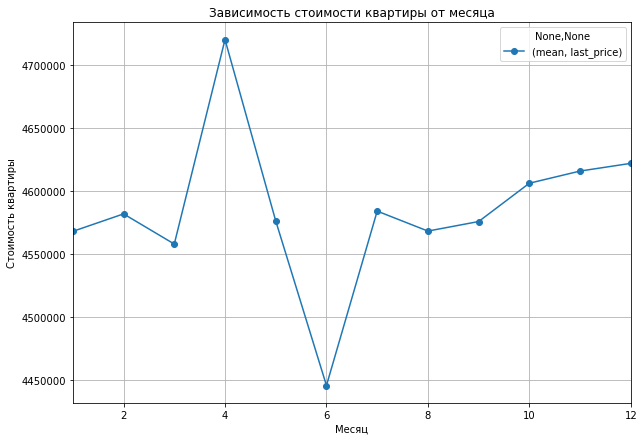

Корреляция цены и месяца:
0.0031009102052561117


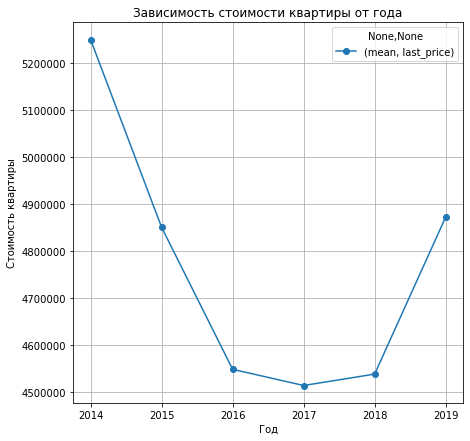

Корреляция цены и года:
0.012258826662614917


In [65]:
# Зависимость стоимости квартиры от даты размещения (день недели, месяц, год)
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price', aggfunc = ['mean'])
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и дня недели:')
print(data['weekday'].corr(data['last_price']))

# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price', aggfunc = ['mean'])
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и месяца:')
print(data['month'].corr(data['last_price']))

# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price', aggfunc = ['mean'])
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.title('Зависимость стоимости квартиры от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.show()
print('Корреляция цены и года:')
print(data['year'].corr(data['last_price']))


Временные параметры практически не влияют на стоимость квартиры, по четвергам квартира уходит дороже всего, месяцы январь и сентябрь тоже молодцы, немного удивило что с 2014го квартиры подешевели, но..

In [66]:
data1 = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
data1.columns = ['mean', 'count', 'median']
data1.sort_values('median', ascending = False)

,mean,count,median
year,,,
2014,5249472.000,78,5120000
2019,4872342.074,2460,4700000
2015,4850564.260,909,4590000
2018,4538588.812,7447,4290000
2016,4548800.924,2346,4200000
2017,4514371.332,7028,4179000


Отсортировав по количеству продаж по годам, видим что выборка за 2014 крайне мала, отбросив в уме этот год, заметим, что сильного резкого спада и не было, но тенценция на снижение в 2016-2017 гг присутствует, и далее видим плавный рост цены.

### Вывод 4. 

  Из проведенного анализа мы видим, что наибольшее влияние на стоимость квартиры оказывает общая площадь, это само собой ожидаемо, чуть менее влияют жилая и кухонная площади, что так же логично, тк в основном общая площадь из них и состоит.  
  Зависимость цены от количества комнат на удивление не такое большое,  хотя как мы понимаем, с увеличением количества комнат должна увеличиваться площадь и соответственно ее стоимость, но скорее всего большие квартиры все таки не так популярны, в большей массе квартиры покупают с площадью до 60м2 и поэтому, полагаю, мы и видим не столь впечатляющую корреляцию.  
  Влияния этажности также присутствует, крайние этажи уступают всем остальным, особенно проигрывают первые этажи, мало кто захочет проживать с осознанием что любой прохожий может заглянуть, а нехороший прохожий и гипотетически пробраться в квартиру. Однако, если бы мы изучали коммерческую недвижимость, уверен, что первые этажи были бы в топе. Но это уже совсем другая история..  
  Влияние дня, месяца и года на цену квартиры, практически отсутствует, хотя мы видим определенную сезонность по месяцам, и сильную разницу в будни и выходные. Года тоже бывают разные, и если убрать слишком маленькие выборки, то видим небольшой спад в 2016-17гг, и далее плавный рост стоимости квартир

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [67]:
# Топ 10 по городам по количеству объявлений выглядит так:
top_locality = data.pivot_table(index = 'locality_name', values = 'sq_m_price', aggfunc=['count', 'mean'])
top_locality.columns = ['count', 'mean']
top_locality = top_locality.sort_values('count', ascending = False).head(10)
display(top_locality)
# Самая высокая стоимость
print('Самая высокая стоимость за м2:')
display(top_locality[top_locality['mean']==top_locality['mean'].max()])
print('Самая низкая стоимость за м2:')
# Самая низкая стоимость
display(top_locality[top_locality['mean']==top_locality['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,12652,104280.534
Мурино,566,86153.092
Кудрово,446,95320.148
Шушары,432,78475.882
Всеволожск,383,66628.123
Колпино,331,75237.402
Пушкин,318,99896.940
Парголово,310,90090.690
Гатчина,299,68415.679


Самая высокая стоимость за м2:


,count,mean
locality_name,,
Санкт-Петербург,12652,104280.534


Самая низкая стоимость за м2:


,count,mean
locality_name,,
Выборг,218,57829.826


Вывод. Самая высокая стоимость за квадратный метр ожидаемо в Санкт-Петербурге, Пушкин и Кудрово идут следом 

#### Выделим квартиры в Санкт-Петербурге по удаленности от центра и вычислим среднюю цену каждого километра

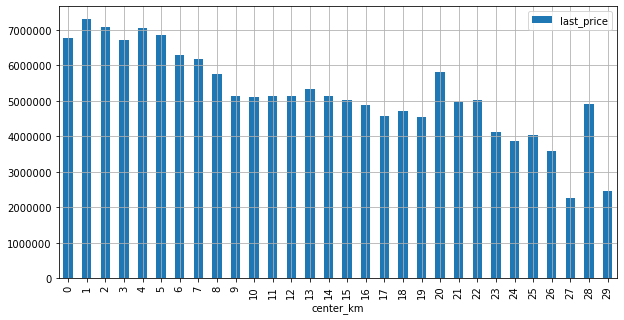

In [68]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, kind = 'bar', figsize=(10, 5))
)
plt.gca().ticklabel_format(axis="y", style='plain')
plt.show()

Здесь мы наблюдаем логичную динамику, что чем дальше от центра, тем квартира дешевле, первые 7км цена примерно одинакова, и далее видим спад. Есть большой выброс на 27м километре, возможно там какой-то элитный поселок)

## Общий вывод

<b> - Был проведен первичный анализ данных файла, отредактирован датасет путем заполнения пропусков, исправления аномалии значений, и удалениия некритичных данных, изменили типы некторых столбцов  
<b> - Далее добавили в таблицу новые столбцы и заполнили их данными для последующего анализа  
<b> - Изучили разные характеристики квартир и убедились, что больше всего продаются:  
    
<b>    1 и 2х комнатные квартиры  
<b>    с площадью от 30 до 60 м2,  
<b>    средняя стоимость квартир примерно 5,7 млн ₽,  
<b>    с высотой потолков в среднем 2,7 м  
<b>    как правило они располагаются до 5го этажа, но существенная часть и до 10го, 
<b>    квартиры на крайних этажах по количеству кратно меньше, чем на всех других  
<b>    большая часть квартир находится в пределах 10км от центра,  
<b>    и в среднем почти в 30км от аэропорта  
<b>    у многих квартир парки в пешей доступности  
<b>    самый активный день, в который выкладывается объявление - это четверг, а месяц - февраль  
### <b> Срок продажи квартиры  
    
<b>  В среднем квартира продается 138 дней или 4,5 месяца, но большая часть успевает уйти за 3 месяца. Есть супербыстрые продажи, которые либо прошли за считанные дни, либо владельцы передумали и сняли объявление, также есть и "долгожители", продающиеся более 2х лет, но таких единицы.  
### <b> Факторы влияющие на стоимость  
    
<b> Наибольшее влияние на стоимость квартиры оказывает общая площадь квартиры, в отличии например от количества комнат  
<b> Квартиры на крайних этажах сильно дешевле остальных квартир, особенно те, что на первом этаже
<b> Дата размещения практически никак не влияет на стоимость квартир  
    
<b> Cамая высокая стоимость за квадратный метр в топ-10 населенных пунктах ожидаемо у Санкт-Петербурга и составляет 110384₽  
<b> Самая низкая стоимость в том же топе у Выборга, почти в 2 раза ниже, чем в Питере - 56887₽  
<b> Дороже всего квартира в центре, в пределах 7км, дальше, чем дальше, тем заметно дешевле   
